In [1]:
library(dplyr)
library(tidyr)
library(Seurat)
library(Matrix)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand



In [2]:
tmp1 <- readRDS("P6_matrix.rds")

In [11]:
load("cellCycleGenes.Rdata")

In [13]:
dim(tmp1)

[1] 34969  9000

In [14]:
mHeart.P6 <- CreateSeuratObject(raw.data=tmp1,min.cells = 10,min.genes = 400)

In [15]:
mHeart.P6 # 19684 genes across 6268 samples

An object of class seurat in project SeuratProject 
 19684 genes across 6268 samples.

In [16]:
mHeart.P6 <- FilterCells(mHeart.P6,"nGene",high.thresholds = 4000,low.thresholds = 500)

In [17]:
mHeart.P6 # 19684 genes across 4560 samples

An object of class seurat in project SeuratProject 
 19684 genes across 4560 samples.

[1] 2698

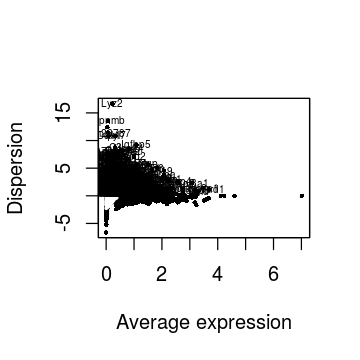

In [18]:
options(repr.plot.width=3,repr.plot.height=3)
mHeart.P6 <- NormalizeData(mHeart.P6)
mHeart.P6 <- FindVariableGenes(object = mHeart.P6,x.low.cutoff = 0.05,y.cutoff = 0.7)
length(mHeart.P6@var.genes)

In [19]:
## regress out cell cycle related genes
mHeart.P6 <- CellCycleScoring(object = mHeart.P6, s.genes = s.genes, g2m.genes = g2m.genes, set.ident = TRUE)

In [20]:
mHeart.P6 <- ScaleData(mHeart.P6,vars.to.regress = c("nUMI","S.Score","G2M.Score"),genes.use = mHeart.P6@var.genes)

Regressing out: nUMI, S.Score, G2M.Score



Time Elapsed:  23.2691915035248 secs

Scaling data matrix


In [21]:
mHeart.P6 <- RunPCA(mHeart.P6,pc.genes = mHeart.P6@var.genes,pcs.compute=50, do.print = TRUE, pcs.print = 1:5, genes.print = 5)

[1] "PC1"
[1] "Sparc"  "Fstl1"  "Igfbp7" "Col3a1" "Col1a2"
[1] ""
[1] "Dmd"      "Slc8a1"   "Ankrd1"   "Erbb4"    "Ppargc1a"
[1] ""
[1] ""
[1] "PC2"
[1] "Egfl7"   "Cav1"    "Adgrf5"  "Gpihbp1" "Cdh5"   
[1] ""
[1] "Col3a1" "Dcn"    "Postn"  "Col1a1" "Col1a2"
[1] ""
[1] ""
[1] "PC3"
[1] "Npr3"  "Bace2" "Plvap" "Cdh11" "Cfh"  
[1] ""
[1] "Sparcl1"   "Meox2"     "Ifi203-ps" "Dach1"     "Btnl9"    
[1] ""
[1] ""
[1] "PC4"
[1] "Gm12338" "Chchd10" "Fabp3"   "Ndufa1"  "Ndufb8" 
[1] ""
[1] "Hmcn1"  "Slc8a1" "Prkg1"  "Dmd"    "Gab2"  
[1] ""
[1] ""
[1] "PC5"
[1] "Msln"   "C3"     "Efemp1" "Upk3b"  "Lrrn4" 
[1] ""
[1] "H19"    "Lgals1" "Igf2"   "Mfap5"  "Ndufb8"
[1] ""
[1] ""


In [22]:
mHeart.P6 <- ProjectPCA(mHeart.P6)

[1] "PC1"
 [1] "Sparc"   "Fstl1"   "Igfbp7"  "Col3a1"  "Col1a2"  "Postn"   "Dcn"    
 [8] "Col1a1"  "Fn1"     "Ltbp4"   "Col4a1"  "Fbn1"    "Nid1"    "Ebf1"   
[15] "Col5a2"  "Fbxl7"   "Cd34"    "Emp1"    "Mest"    "Aspn"    "Fbln2"  
[22] "Loxl2"   "Mfap5"   "Col14a1" "Ptn"     "Crip1"   "Dpt"     "Eln"    
[29] "Egfl7"   "Col5a1" 
[1] ""
 [1] "Dmd"           "Slc8a1"        "Ankrd1"        "Erbb4"        
 [5] "Ppargc1a"      "Esrrg"         "Kcnn2"         "1500017E21Rik"
 [9] "Chrm2"         "Gm30382"       "Gm45707"       "Nppb"         
[13] "Kcnd2"         "Fabp3"         "Pirt"          "Rgs6"         
[17] "Mid1"          "Kcnq5"         "Slc16a10"      "1700040L02Rik"
[21] "Ddc"           "Nmrk2"         "Gm5860"        "Xirp2"        
[25] "Parm1"         "Ntn4"          "Dpf3"          "Abcc9"        
[29] "Gm45423"       "Nr6a1os"      
[1] ""
[1] ""
[1] "PC2"
 [1] "Egfl7"     "Cav1"      "Adgrf5"    "Gpihbp1"   "Cdh5"      "Fabp4"    
 [7] "Flt1"      "Pecam1"    "Kdr"   

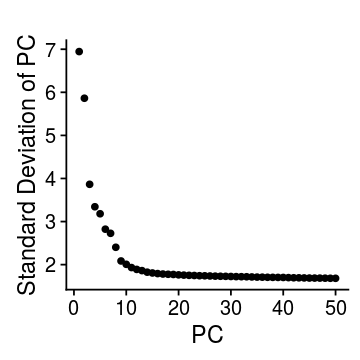

In [23]:
options(repr.plot.width=3,repr.plot.height=3)
PCElbowPlot(object =mHeart.P6,num.pc = 50)

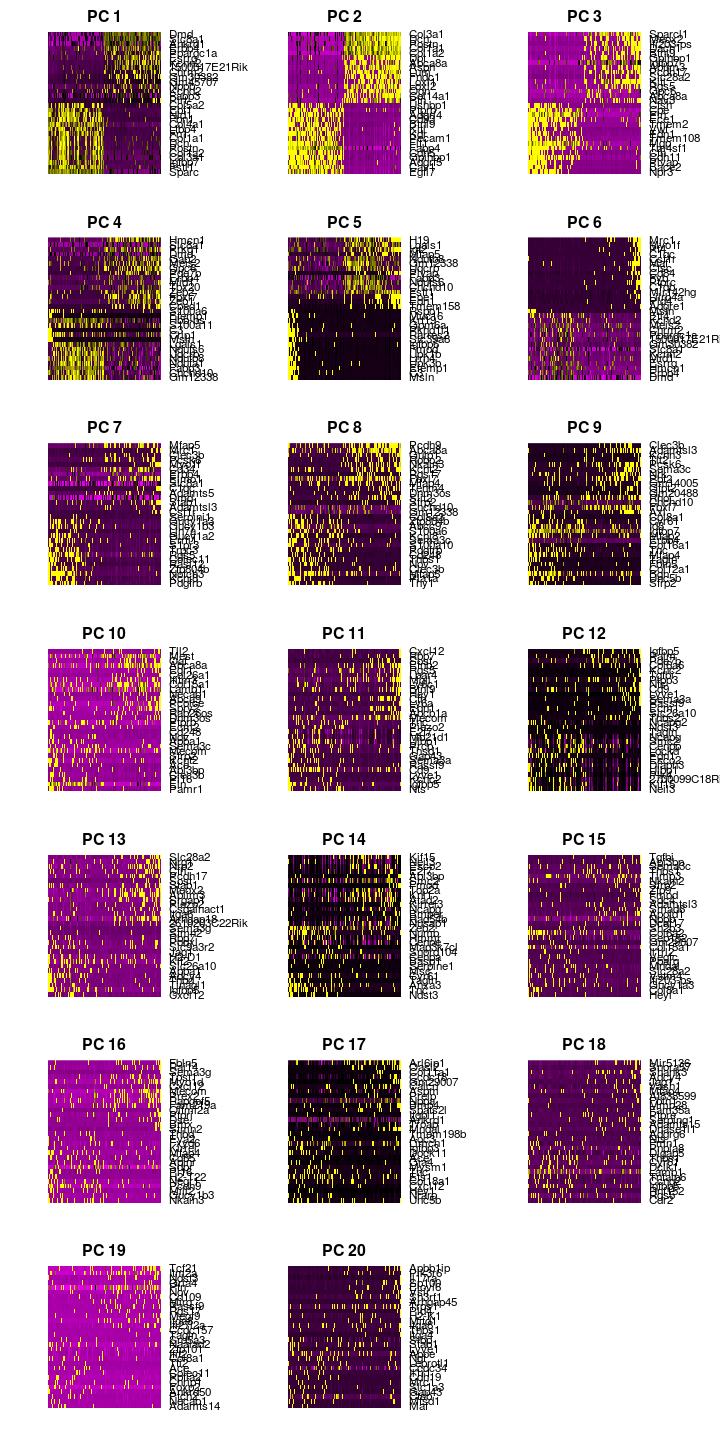

In [24]:
options(repr.plot.width=6, repr.plot.height=12)
PCHeatmap(mHeart.P6, pc.use = c(1:15,16:20), cells.use = 500, do.balanced = TRUE)

In [25]:
cluster_pc_res <- function(pancreas,pcs=1:25,res=0.6) {
  pancreas<- FindClusters(object = pancreas, reduction.type = "pca", dims.use = pcs, resolution = res, print.output = 0, save.SNN = TRUE)
  pancreas <- RunTSNE(object = pancreas, dims.use = pcs)
}

In [26]:
mHeart.P6 <- cluster_pc_res(mHeart.P6,pcs=1:15,res=c(0.6,0.8,1))

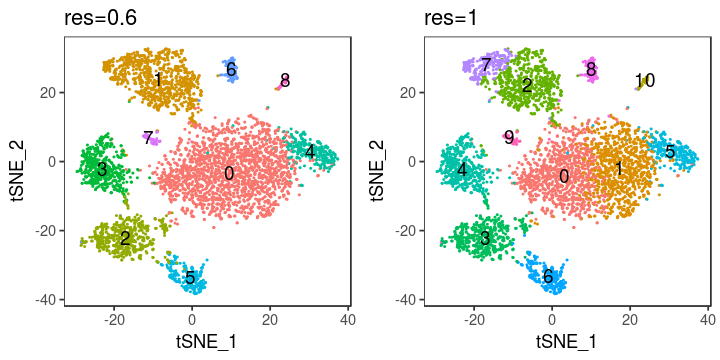

In [29]:
options(repr.plot.width=6, repr.plot.height=3)
p1 <- TSNEPlot(object = mHeart.P6 , pt.size = 0.2,do.label = T, no.legend=T, do.return = T,group.by="res.0.6")+ggtitle("res=0.6")
p2 <- TSNEPlot(object = mHeart.P6 , pt.size = 0.2,do.label = T, no.legend=T, do.return = T,group.by="res.1")+ggtitle("res=1")
plot_grid(p1,p2,align="h")

In [34]:
## set high resolution
mHeart.P6 <- SetAllIdent(mHeart.P6,id="res.1")

In [37]:
## compare the differentially expressed genes between cluster 0,1 
c0_1 <- FindMarkers(mHeart.P6,0,1,logfc.threshold = .7)
dim(c0_1)

[1] 1 5

In [38]:
## compare the differentially expressed genes between cluster 2,7 
c2_7 <- FindMarkers(mHeart.P6,2,7,logfc.threshold = .7)
dim(c2_7)

[1] 71  5

In [43]:
c0_1 # only 1 gene Nppa was differentially expressed between cluster 0 and 1 while 71 DEGs are detected between 2 and 7
# We merge cluster 0 and 1
mHeart.P6@meta.data$res.m <- plyr::mapvalues(mHeart.P6@meta.data$res.1,0:10,c(1,1:10))

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Nppa,1.03111e-15,0.7998012,0.404,0.261,2.029637e-11


In [44]:
mHeart.P6 <- SetAllIdent(mHeart.P6,id="res.m")

In [45]:
# identify the marks for each cluster
mHeart.P6.mak <- FindAllMarkers(mHeart.P6,only.pos = T,logfc.threshold = .5)

In [46]:
# check the representative markers for each clusters
mHeart.P6.mak %>% group_by(cluster) %>% slice(1:5)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0.000000e+00,1.5116735,0.743,0.204,0.000000e+00,1,RP24-559D16.1
0.000000e+00,1.4934711,0.951,0.434,0.000000e+00,1,Ryr2
0.000000e+00,1.4410488,0.934,0.382,0.000000e+00,1,Ctnna3
0.000000e+00,1.4154106,0.949,0.476,0.000000e+00,1,Slc8a1
0.000000e+00,1.4147905,0.944,0.466,0.000000e+00,1,Dmd
0.000000e+00,2.1110775,0.613,0.058,0.000000e+00,2,Abca8a
4.428343e-303,1.7737838,0.845,0.194,8.716751e-299,2,Postn
3.955510e-269,1.4185211,0.954,0.376,7.786026e-265,2,Col3a1
2.884213e-237,1.4843345,0.878,0.304,5.677285e-233,2,Col1a2
4.933849e-229,1.2999263,0.807,0.221,9.711788e-225,2,Dcn


In [49]:
# annotate each cluster
mHeart.P6@meta.data$res.name <- plyr::mapvalues(mHeart.P6@meta.data$res.m,1:10,
                                    c("dCM","Fib1","EC2","mCM","pCM","EC1","Fib2","PC/SMC","BC","Epi"))

In [50]:
mHeart.P6 <- SetAllIdent(mHeart.P6,id="res.name")

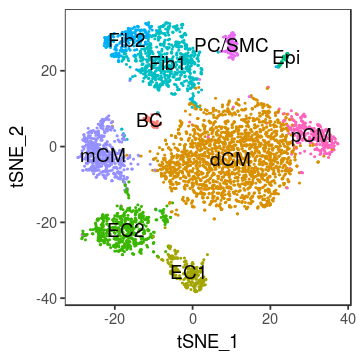

In [51]:
options(repr.plot.width=3, repr.plot.height=3)
TSNEPlot(object = mHeart.P6 , pt.size = 0.2,do.label = T, no.legend=T, do.return = T)
# figure2a in the paper was rotated 180 degree